In [1]:
import sklearn
import sys
print(f"Python version: {sys.version}")
print(f"scikit-learn version: {sklearn.__version__}")

Python version: 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:56:27) [GCC 11.2.0]
scikit-learn version: 1.6.1


In [2]:
import pandas as pd
import numpy as np
import random
import sys
import os
!pip install tldextract -q
import tldextract
import warnings
from typing import *

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
import seaborn as sns 
from urllib.parse import urlparse
from nltk.tokenize import RegexpTokenizer
import joblib
warnings.filterwarnings("ignore")

In [4]:
large_dataset = "/home/n1ved/.cache/kagglehub/datasets/taruntiwarihp/phishing-site-urls/versions/1/phishing_site_urls.csv"
url_data = pd.read_csv(large_dataset)

In [5]:
url_data = url_data.rename(columns={"URL": "url", "Label": "label"})

In [9]:
url_data

,url,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [11]:
from typing import Optional, Dict
from urllib.parse import urlparse
def parse_url(url: str) -> Optional[Dict[str, str]]:
    try:
        no_scheme = not url.startswith('https://') and not url.startswith('http://')
        if no_scheme:
            parsed_url = urlparse(f"http://{url}")
            return {
                "scheme": None, # not established a value for this
                "netloc": parsed_url.netloc,
                "path": parsed_url.path,
                "params": parsed_url.params,
                "query": parsed_url.query,
                "fragment": parsed_url.fragment,
            }
        else:
            parsed_url = urlparse(url)
            return {
                "scheme": parsed_url.scheme,
                "netloc": parsed_url.netloc,
                "path": parsed_url.path,
                "params": parsed_url.params,
                "query": parsed_url.query,
                "fragment": parsed_url.fragment,
            }
    except:
        return None

In [13]:
url_data["parsed_url"] = url_data.url.apply(parse_url)
url_data

,url,label,parsed_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"{'scheme': None, 'netloc': 'nobell.it', 'path'..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"{'scheme': None, 'netloc': 'www.dghjdgf.com', ..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"{'scheme': None, 'netloc': 'serviciosbys.com',..."
3,mail.printakid.com/www.online.americanexpress....,bad,"{'scheme': None, 'netloc': 'mail.printakid.com..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"{'scheme': None, 'netloc': 'thewhiskeydregs.co..."
...,...,...,...
549341,23.227.196.215/,bad,"{'scheme': None, 'netloc': '23.227.196.215', '..."
549342,apple-checker.org/,bad,"{'scheme': None, 'netloc': 'apple-checker.org'..."
549343,apple-iclods.org/,bad,"{'scheme': None, 'netloc': 'apple-iclods.org',..."
549344,apple-uptoday.org/,bad,"{'scheme': None, 'netloc': 'apple-uptoday.org'..."


In [15]:
url_data = pd.concat([
    url_data.drop(['parsed_url'], axis=1),
    url_data['parsed_url'].apply(pd.Series)
], axis=1)
url_data

,url,label,scheme,netloc,path,params,query,fragment
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,None,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,None,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,,,
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,None,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,,,
3,mail.printakid.com/www.online.americanexpress....,bad,None,mail.printakid.com,/www.online.americanexpress.com/index.html,,,
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,None,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,,84784787824HDJNDJDSJSHD//2724782784/,
...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,None,23.227.196.215,/,,,
549342,apple-checker.org/,bad,None,apple-checker.org,/,,,
549343,apple-iclods.org/,bad,None,apple-iclods.org,/,,,
549344,apple-uptoday.org/,bad,None,apple-uptoday.org,/,,,


In [17]:
url_data = url_data[~url_data.netloc.isnull()]

In [19]:
url_data["length"] = url_data.url.str.len()

In [21]:
url_data["tld"] = url_data.netloc.apply(lambda nl: tldextract.extract(nl).suffix)
url_data['tld'] = url_data['tld'].replace('','None')

In [23]:
url_data["is_ip"] = url_data.netloc.str.fullmatch(r"\d+\.\d+\.\d+\.\d+")

In [25]:
url_data['domain_hyphens'] = url_data.netloc.str.count('-')
url_data['domain_underscores'] = url_data.netloc.str.count('_')
url_data['path_hyphens'] = url_data.path.str.count('-')
url_data['path_underscores'] = url_data.path.str.count('_')
url_data['slashes'] = url_data.path.str.count('/')

In [27]:
url_data['full_stops'] = url_data.path.str.count('.')

In [29]:
def get_num_subdomains(netloc: str) -> int:
    subdomain = tldextract.extract(netloc).subdomain 
    if subdomain == "":
        return 0
    return subdomain.count('.') + 1

url_data['num_subdomains'] = url_data['netloc'].apply(lambda net: get_num_subdomains(net))

In [31]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
def tokenize_domain(netloc: str) -> str:
    split_domain = tldextract.extract(netloc)
    no_tld = str(split_domain.subdomain +'.'+ split_domain.domain)
    return " ".join(map(str,tokenizer.tokenize(no_tld)))
         
url_data['domain_tokens'] = url_data['netloc'].apply(lambda net: tokenize_domain(net))

In [33]:
url_data['path_tokens'] = url_data['path'].apply(lambda path: " ".join(map(str,tokenizer.tokenize(path))))

In [35]:
url_data_y = url_data['label']
url_data.drop('label', axis=1, inplace=True)
url_data.drop('url', axis=1, inplace=True)
url_data.drop('scheme', axis=1, inplace=True)
url_data.drop('netloc', axis=1, inplace=True)
url_data.drop('path', axis=1, inplace=True)
url_data.drop('params', axis=1, inplace=True)
url_data.drop('query', axis=1, inplace=True)
url_data.drop('fragment', axis=1, inplace=True)
url_data

,length,tld,is_ip,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens
0,225,it,False,0,0,1,0,8,125,0,nobell,ffb d dca cce f login SkyPe com en cgi bin ver...
1,81,com,False,0,0,2,1,4,66,1,www dghjdgf,paypal co uk cycgi bin webscrcmd home customer...
2,177,com,False,0,0,1,0,11,161,0,serviciosbys,paypal cgi bin get into herf secure dispatch r...
3,60,com,False,0,0,0,0,2,42,1,mail printakid,www online americanexpress com index html
4,116,com,False,0,0,1,0,7,60,0,thewhiskeydregs,wp content themes widescreen includes temp pro...
...,...,...,...,...,...,...,...,...,...,...,...,...
549341,15,None,True,0,0,0,0,1,1,0,,
549342,18,org,False,1,0,0,0,1,1,0,apple checker,
549343,17,org,False,1,0,0,0,1,1,0,apple iclods,
549344,18,org,False,1,0,0,0,1,1,0,apple uptoday,


In [37]:
class Converter(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, data_frame):
        return data_frame.values.ravel()
        

In [39]:
X_train, X_test, y_train, y_test = train_test_split(url_data, url_data_y, test_size=0.2)

In [41]:
numeric_features = ['length', 'domain_hyphens', 'domain_underscores', 'path_hyphens', 'path_underscores', 'slashes', 'full_stops', 'num_subdomains']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

In [43]:
categorical_features = ['tld', 'is_ip']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [45]:
vectorizer_features = ['domain_tokens','path_tokens']
vectorizer_transformer = Pipeline(steps=[
    ('con', Converter()),
    ('tf', TfidfVectorizer())])

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('domvec', vectorizer_transformer, ['domain_tokens']),
        ('pathvec', vectorizer_transformer, ['path_tokens'])
    ])

svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])

log_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

nb_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MultinomialNB())])

In [25]:
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['length', 'domain_hyphens',
                                                   'domain_underscores',
                                                   'path_hyphens',
                                                   'path_underscores',
                                                   'slashes', 'full_stops',
                                                   'num_subdomains']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['tld', 'is_ip']),
                                                 ('domvec',
                                                  Pipeline(steps=[('con',
                                                                   Converter()),
                                                                  ('tf',
                                                                   TfidfVectorizer())]),
                                                  ['domain_tokens']),
                                                 ('pathvec',
                                                  Pipeline(steps=[('con',
                                                                   Converter()),
                                                                  ('tf',
                                                                   TfidfVectorizer())]),
                                                  ['path_tokens'])])),
                ('classifier', LinearSVC())])

In [49]:
def results(name: str, model: BaseEstimator) -> None:
    preds = model.predict(X_test)

    print(name + " score: %.3f" % model.score(X_test, y_test))
    print(classification_report(y_test, preds))
    labels = ['Good', 'Bad']

    conf_matrix = confusion_matrix(y_test, preds)

    font = {'family' : '',
            'size'   : 14}

    plt.rc('font', **font)
    plt.figure(figsize= (10,6))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap='Blues')
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

In [51]:
log_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['length', 'domain_hyphens',
                                                   'domain_underscores',
                                                   'path_hyphens',
                                                   'path_underscores',
                                                   'slashes', 'full_stops',
                                                   'num_subdomains']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['tld', 'is_ip']),
                                                 ('domvec',
                                                  Pipeline(steps=[('con',
                                                                   Converter()),
                                                                  ('tf',
                                                                   TfidfVectorizer())]),
                                                  ['domain_tokens']),
                                                 ('pathvec',
                                                  Pipeline(steps=[('con',
                                                                   Converter()),
                                                                  ('tf',
                                                                   TfidfVectorizer())]),
                                                  ['path_tokens'])])),
                ('classifier', LogisticRegression())])

In [55]:
nb_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['length', 'domain_hyphens',
                                                   'domain_underscores',
                                                   'path_hyphens',
                                                   'path_underscores',
                                                   'slashes', 'full_stops',
                                                   'num_subdomains']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['tld', 'is_ip']),
                                                 ('domvec',
                                                  Pipeline(steps=[('con',
                                                                   Converter()),
                                                                  ('tf',
                                                                   TfidfVectorizer())]),
                                                  ['domain_tokens']),
                                                 ('pathvec',
                                                  Pipeline(steps=[('con',
                                                                   Converter()),
                                                                  ('tf',
                                                                   TfidfVectorizer())]),
                                                  ['path_tokens'])])),
                ('classifier', MultinomialNB())])

LOG score: 0.962
              precision    recall  f1-score   support

         bad       0.97      0.89      0.93     31421
        good       0.96      0.99      0.97     78445

    accuracy                           0.96    109866
   macro avg       0.97      0.94      0.95    109866
weighted avg       0.96      0.96      0.96    109866



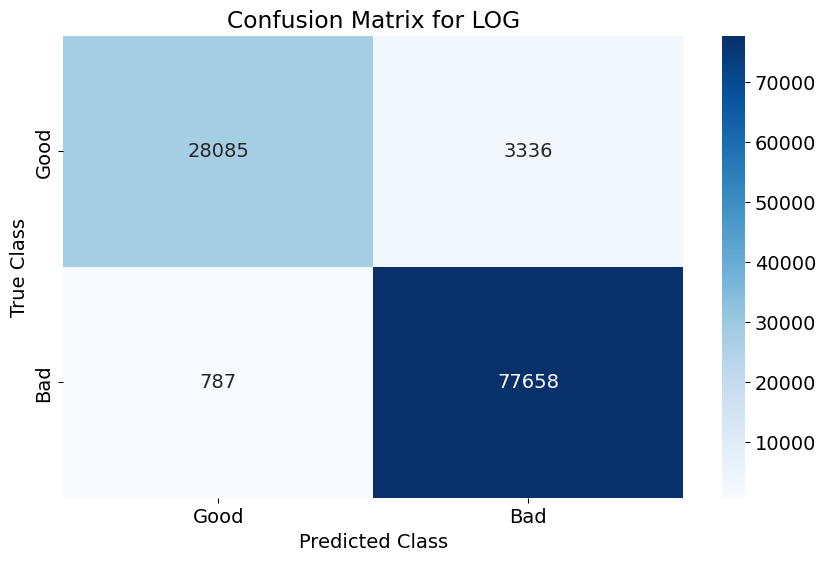

In [53]:
results("LOG" , log_clf)

SVC score: 0.984
              precision    recall  f1-score   support

         bad       0.98      0.96      0.97     31080
        good       0.98      0.99      0.99     78786

    accuracy                           0.98    109866
   macro avg       0.98      0.98      0.98    109866
weighted avg       0.98      0.98      0.98    109866



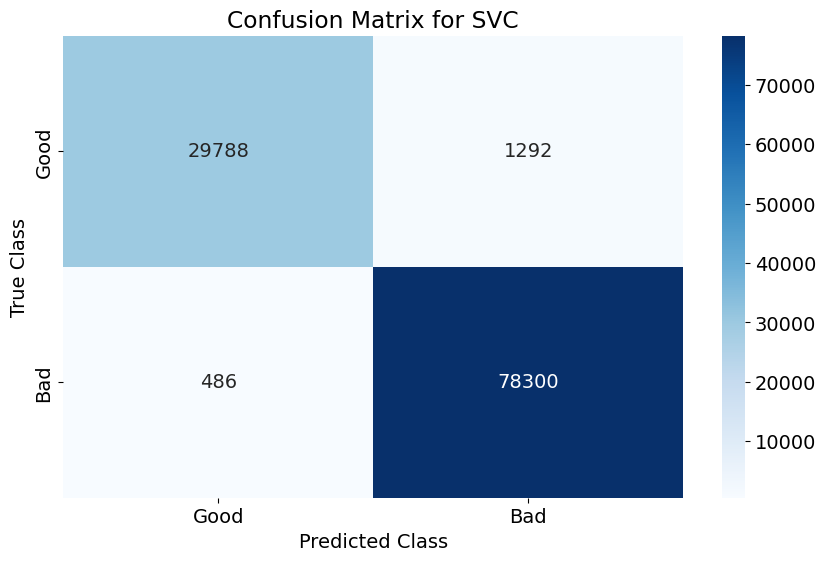

In [67]:
results("SVC" , svc_clf)

NB score: 0.971
              precision    recall  f1-score   support

         bad       0.96      0.94      0.95     31421
        good       0.97      0.99      0.98     78445

    accuracy                           0.97    109866
   macro avg       0.97      0.96      0.96    109866
weighted avg       0.97      0.97      0.97    109866



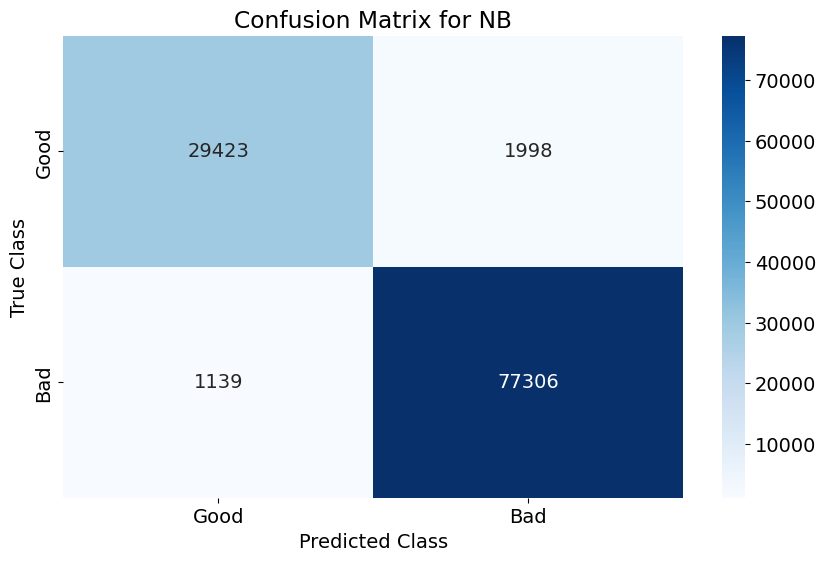

In [57]:
results("NB" , nb_clf)

In [59]:
import joblib
import os

In [63]:
joblib.dump(log_clf, 'models/phishing_url_log_model.joblib')
joblib.dump(nb_clf, 'models/phishing_url_nb_model.joblib')

['models/phishing_url_nb_model.joblib']

In [65]:
import joblib
import pandas as pd
import tldextract
from urllib.parse import urlparse
from nltk.tokenize import RegexpTokenizer
import sys

class PhishingURLDetector:
    def __init__(self, model_path='models/phishing_url_svc_model.joblib'):
        self.model = joblib.load(model_path)
        self.svm = joblib.load('models/phishing_url_svc_model.joblib')
        self.rf  = joblib.load('models/phishing_url_rf_model.joblib')
        self.logm = joblib.load('models/phishing_url_log_model.joblib')
        self.nb = joblib.load('models/phishing_url_nb_model.joblib')
        self.tokenizer = RegexpTokenizer(r'[A-Za-z]+')

    def parse_url(self, url: str) -> pd.DataFrame:
        try:
            no_scheme = not url.startswith('https://') and not url.startswith('http://')
            if no_scheme:
                parsed_url = urlparse(f"http://{url}")
            else:
                parsed_url = urlparse(url)

            url_features = pd.DataFrame({
                'length': [len(url)],
                'tld': [tldextract.extract(parsed_url.netloc).suffix or 'None'],
                'is_ip': [bool(parsed_url.netloc.replace('.','').isnumeric())],
                'domain_hyphens': [parsed_url.netloc.count('-')],
                'domain_underscores': [parsed_url.netloc.count('_')],
                'path_hyphens': [parsed_url.path.count('-')],
                'path_underscores': [parsed_url.path.count('_')],
                'slashes': [parsed_url.path.count('/')],
                'full_stops': [parsed_url.path.count('.')],
                'num_subdomains': [self._get_num_subdomains(parsed_url.netloc)],
                'domain_tokens': [self._tokenize_domain(parsed_url.netloc)],
                'path_tokens': [self._tokenize_path(parsed_url.path)]
            })

            return url_features

        except Exception as e:
            print(f"Error parsing URL: {e}")
            return None

    def _get_num_subdomains(self, netloc: str) -> int:
        subdomain = tldextract.extract(netloc).subdomain 
        return subdomain.count('.') + 1 if subdomain else 0

    def _tokenize_domain(self, netloc: str) -> str:
        split_domain = tldextract.extract(netloc)
        no_tld = str(split_domain.subdomain +'.'+ split_domain.domain)
        return " ".join(map(str, self.tokenizer.tokenize(no_tld)))

    def _tokenize_path(self, path: str) -> str:
        return " ".join(map(str, self.tokenizer.tokenize(path)))

    def predict(self, url: str) -> dict:
        url_features = self.parse_url(url)
        
        if url_features is None:
            return {
                'error': 'Could not parse URL',
                'is_phishing': None,
                'confidence': None
            }

        try:
            prediction = self.model.predict(url_features)
            try:
                proba = self.model.predict_proba(url_features)[0]
            except AttributeError:
                proba = None
            try:
                confidence = self.model.decision_function(url_features)[0]
            except AttributeError:
                confidence = None

            return {
                'url': url,
                'prediction': prediction,
                'probability': proba,
                'confidence': confidence
            }

        except Exception as e:
            print(f"Prediction error: {e}")
            return {
                'error': 'Prediction failed',
                'is_phishing': None,
                'confidence': None
            }
    def predict_weighted(self ,url:str) -> dict:
            url_features = self.parse_url(url)
            rf_percent = None
            rf_prediction = None
            svm_percent = None
            svm_prediction = None
            if url_features is None:
                return {
                    'error' : 'Cannot Parse URL',
                    'is_phishing' : None,
                    'confidence' : None,
                }
            try:
                rf_percent = self.rf.predict_proba(url_features)[0][0]
                rf_prediction = self.rf.predict(url_features)[0]
            except AttributeError:
                rf_percent = None;

            if rf_percent >= 0.4 and rf_percent <= 0.6:
                try:
                    svm_percent = self.svm.decision_function(url_features)[0]
                    svm_prediction = self.svm.predict(url_features)[0]
                except:
                    svm_percent = None
                    
            
            return {
                'error' : None,
                'is_phishing' : None,
                'confidence' : rf_percent if svm_percent is None else svm_percent,
                'prediction' : ('good' if rf_percent < 0.5 else 'bad')if svm_prediction is None else svm_prediction
            }
            
         


In [67]:
detector = PhishingURLDetector()

test_urls = [
    'https://www.google.com',
    'http://suspicious-site.com/phishing',
    'https://totally-legit-bank.verify-account.xyz',
    'nobell.it/70ffb52d079109dca5664cce6f317373782'
]

for url in test_urls:
    result = detector.predict(url)
    print(f"\nURL: {url}")
    print(f"Prediction: {result['prediction']}")
    if result.get('confidence') is not None:
        print(f"Confidence: {result['confidence']}")
    if result.get('prediction') is not None:
        print(f"Prediction: {result['prediction']}")



URL: https://www.google.com
Prediction: ['good']
Confidence: 1.045522283229022
Prediction: ['good']

URL: http://suspicious-site.com/phishing
Prediction: ['bad']
Confidence: -0.15543403076069628
Prediction: ['bad']

URL: https://totally-legit-bank.verify-account.xyz
Prediction: ['bad']
Confidence: -3.2112815475990226
Prediction: ['bad']

URL: nobell.it/70ffb52d079109dca5664cce6f317373782
Prediction: ['bad']
Confidence: -0.17820703034056473
Prediction: ['bad']


In [79]:
detector = PhishingURLDetector('models/phishing_url_svc_model.joblib')
detector2 = PhishingURLDetector('models/phishing_url_log_model.joblib')

test_urls = [
    'https://www.google.com',
    'http://suspicious-site.com/phishing',
    'https://totally-legit-bank.verify-account.xyz',
    'nobell.it/70ffb52d079109dca5664cce6f317373782',
    'https://mec.ac.in',
    'https://ktu.edu.in',
    'https://mvd.kerala.gov.in',
    'https://facebook.com/'
]

for url in test_urls:
    result = detector.predict(url)
    print(f"\nURL: {url}")
    print(f"Prediction: {result['prediction']}")
    if result.get('confidence') is not None:
        print(f"Confidence: {result['confidence']}")
    if result.get('probability') is not None:
        print(f"Probability: {result['probability']}")

for url in test_urls:
    result = detector2.predict(url)
    print(f"\nURL: {url}")
    print(f"Prediction: {result['prediction']}")
    if result.get('confidence') is not None:
        print(f"Confidence: {result['confidence']}")
    if result.get('probability') is not None:
        print(f"Probability: {result['probability']}")


URL: https://www.google.com
Prediction: ['good']
Confidence: 1.045522283229022

URL: http://suspicious-site.com/phishing
Prediction: ['bad']
Confidence: -0.15543403076069628

URL: https://totally-legit-bank.verify-account.xyz
Prediction: ['bad']
Confidence: -3.2112815475990226

URL: nobell.it/70ffb52d079109dca5664cce6f317373782
Prediction: ['bad']
Confidence: -0.17820703034056473

URL: https://mec.ac.in
Prediction: ['good']
Confidence: 0.6675934129745681

URL: https://ktu.edu.in
Prediction: ['good']
Confidence: 1.2648115224462027

URL: https://mvd.kerala.gov.in
Prediction: ['good']
Confidence: 0.03475817760783763

URL: https://facebook.com/
Prediction: ['good']
Confidence: 1.355940225548727

URL: https://www.google.com
Prediction: ['good']
Confidence: 3.1596106750086297
Probability: [0.04071426 0.95928574]

URL: http://suspicious-site.com/phishing
Prediction: ['bad']
Confidence: -2.5757255326400625
Probability: [0.92928288 0.07071712]

URL: https://totally-legit-bank.verify-account.xy